# Natural Language Processing using NLTK

In [8]:
# Install NLTK - pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Part 0 - Get some Data!

This section's code is mostly given to you as a review for how you can scrape and manipulate data from the web. 



In [9]:
import urllib
import bs4 as bs
import re

In [2]:
# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own! You can use the url below:
url = 'https://en.wikipedia.org/wiki/Barack_Obama' # you can change this to use other sites as well.

# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen(url).read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser")

In [3]:
# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

In [4]:
text[:100]

'\nBarack Hussein Obama II (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (listen) bə-RAHK hoo-SAYN oh-BAH-mə;[1] born A'

#### Basic Preprocessing Using Regular Expression \(Regex\)



A regex is a string of text that allows you to create patterns that help match, locate, and manage text.

**Good resources:** 

regular expression tester: https://regex101.com/



In [5]:
# Preprocessing the data

text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

text = text.lower() #everything to lowercase

In [6]:
text[:100]

' barack hussein obama ii (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (listen) bə-rahk hoo-sayn oh-bah-mə; born augu'

## NLP Part 1 - Tokenization of paragraphs/sentences

In this section we are going to tokenize our sentences and words. If you aren't familiar with tokenization, we recommend looking up "what is tokenization". 

You should also spend time on the [NLTK documentation](https://www.nltk.org/). If you're not sure how to do something, or get an error, it is best to google it first and ask questions as you go!



In [10]:
'''
Your code here: Tokenize the words from the data and set it to a variable called words.
Hint: how to this might be on the very home page of NLTK!
'''
words = nltk.word_tokenize(text)

In [11]:
print(words[:10])

['barack', 'hussein', 'obama', 'ii', '(', '/bəˈrɑːk', 'huːˈseɪn', 'oʊˈbɑːmə/', '(', 'listen']


In [12]:
'''
Your code here: Tokenize the sentences from the data  and set it to a variable called sentences.
Hint: try googling how to tokenize sentences in NLTK!
'''
sentences = nltk.sent_tokenize(text)

In [13]:
print(sentences[:10])

[' barack hussein obama ii (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (listen) bə-rahk hoo-sayn oh-bah-mə; born august , ) is an american politician who served as the th president of the united states from to .', 'he was the first african-american president of the united states.', 'a member of the democratic party, he previously served as a u.s. senator from illinois from to and as an illinois state senator from to .', 'obama was born in honolulu, hawaii.', 'after graduating from columbia university in , he worked as a community organizer in chicago.', 'in , he enrolled in harvard law school, where he was the first black president of the harvard law review.', 'after graduating, he became a civil rights attorney and an academic, teaching constitutional law at the university of chicago law school from to .', 'turning to elective politics, he represented the th district in the illinois senate from until , when he ran for the u.s. senate.', 'obama received national attention in with his march senate pri

## NLP Part 2 - Stopwords and Punctuation
Now we are going to work to remove stopwords and punctuation from our data. Why do you think we are going to do this? Do some research if you don't know yet. 

In [67]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
'''
define a function called "remove_stopwords" that takes in a list of the sentences of the text and returns one that doesn't have any stopwords.
'''
def remove_stopwords(sentences):

    ### Some code goes here. Hint: You may have to look up how to remove stopwords in NLTK if you get stuck. ###
    for i in range(len(sentences)):

        words = []

        word_list = nltk.word_tokenize(sentences[i])

        for word in word_list:
            if word not in stopwords.words('english'):
                words.append(word)

        sentences[i] = ' '.join(words)

    return sentences

###Then actually apply your function###
sentences = remove_stopwords(sentences)
print(sentences[:10]) #Check if it worked correctly. Are all stopwords removed?

NameError: name 'stopwords' is not defined

In [15]:
'''
define a function called "remove_punctuation" that removes punctuation from the sentences.
'''
def remove_punctuation(sentences):

    ### Some code goes here. Hint: Try looking up how to remove stopwords in NLTK if you get stuck. ###
    for i in range(len(sentences)):
        words = []

        word_list = nltk.word_tokenize(sentences[i])

        for word in word_list:
            if word not in ",.?!()":
                words.append(word)

        sentences[i] = ' '.join(words)

    return sentences
sentences = remove_punctuation(sentences)
print(sentences[:10]) #eliminating all punctuation.

['barack hussein obama ii /bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ listen bə-rahk hoo-sayn oh-bah-mə ; born august is an american politician who served as the th president of the united states from to', 'he was the first african-american president of the united states', 'a member of the democratic party he previously served as a u.s. senator from illinois from to and as an illinois state senator from to', 'obama was born in honolulu hawaii', 'after graduating from columbia university in he worked as a community organizer in chicago', 'in he enrolled in harvard law school where he was the first black president of the harvard law review', 'after graduating he became a civil rights attorney and an academic teaching constitutional law at the university of chicago law school from to', 'turning to elective politics he represented the th district in the illinois senate from until when he ran for the u.s. senate', 'obama received national attention in with his march senate primary win his well-received jul

## NLP Part 3a - Stemming the words
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There is an example below!

In [16]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# try each of the words below
stemmer.stem('troubled')
stemmer.stem('trouble')
stemmer.stem('troubling')
stemmer.stem('troubles')

'troubl'

In [17]:
'''
Your code here:
Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
'''
def stem_sentences(sentences):
    ### Some code goes here. Hint: Try looking up how to stem words in NLTK if you get stuck (or simply use the example above and run stemmer in a loop!).
    for i in range(len(sentences)):
        words = []

        word_list = nltk.word_tokenize(sentences[i])

        for word in word_list:
            words.append(stemmer.stem(word))

        sentences[i] = ' '.join(words)

    return sentences

In [18]:
stemmed_sentences = stem_sentences(sentences)
print(stemmed_sentences[:10])

['barack hussein obama ii /bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ listen bə-rahk hoo-sayn oh-bah-mə ; born august is an american politician who serv as the th presid of the unit state from to', 'he wa the first african-american presid of the unit state', 'a member of the democrat parti he previous serv as a u.s. senat from illinoi from to and as an illinoi state senat from to', 'obama wa born in honolulu hawaii', 'after graduat from columbia univers in he work as a commun organ in chicago', 'in he enrol in harvard law school where he wa the first black presid of the harvard law review', 'after graduat he becam a civil right attorney and an academ teach constitut law at the univers of chicago law school from to', 'turn to elect polit he repres the th district in the illinoi senat from until when he ran for the u.s. senat', 'obama receiv nation attent in with hi march senat primari win hi well-receiv juli democrat nation convent keynot address and hi landslid novemb elect to the senat', 'in a year a

## NLP Part 3b - Lemmatization
Lemmatization considers the context and converts the word to its meaningful base form. There is a cool tutorial and definition of lemmatization in NLTK [here](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/).

In [19]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
from nltk.stem import WordNetLemmatizer

## Step 1: Import the lemmatizer
lemmatizer = WordNetLemmatizer()

'''
Your code here: Define a function called "lem_sentences" that: loops through the sentences, split the sentences up by words and applies "lemmatizer.lemmatize" to each word and then join everything back into a sentence
'''
##Similar to stopwords: For loop through the sentences, split by words and apply "lemmatizer.lemmatize" to each word and join back into a sentence
def lem_sentences(sentences):

    for i in range(len(sentences)):

        words = []

        word_list = nltk.word_tokenize(sentences[i])

        for word in word_list:
            words.append(lemmatizer.lemmatize(word))

        sentences[i] = ' '.join(words)

    return sentences

In [21]:
sentences = lem_sentences(sentences)
print(sentences[:10])

['barack hussein obama ii /bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ listen bə-rahk hoo-sayn oh-bah-mə ; born august is an american politician who serv a the th presid of the unit state from to', 'he wa the first african-american presid of the unit state', 'a member of the democrat parti he previous serv a a u.s. senat from illinoi from to and a an illinoi state senat from to', 'obama wa born in honolulu hawaii', 'after graduat from columbia univers in he work a a commun organ in chicago', 'in he enrol in harvard law school where he wa the first black presid of the harvard law review', 'after graduat he becam a civil right attorney and an academ teach constitut law at the univers of chicago law school from to', 'turn to elect polit he repres the th district in the illinoi senat from until when he ran for the u.s. senat', 'obama receiv nation attent in with hi march senat primari win hi well-receiv juli democrat nation convent keynot address and hi landslid novemb elect to the senat', 'in a year after

## NLP Part 4 - POS Tagging
Parts of speech tagging is marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [22]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
# POS Tagging example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem

tagged_words = nltk.pos_tag(all_words)
##Creates a list of lists where each element of the list is [word,partofspeech abbreviation]

# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)

'''
Your code here: print the first 1000 characters of tagged_paragraph.
'''
tagged_paragraph[:1000]

'barack_NN hussein_NN obama_NN ii_NN (_( /bəˈrɑːk_JJ huːˈseɪn_NN oʊˈbɑːmə/_NN (_( listen_JJ )_) bə-rahk_JJ hoo-sayn_JJ oh-bah-mə_NN ;_: born_VBN august_RB ,_, )_) is_VBZ an_DT american_JJ politician_NN who_WP served_VBD as_IN the_DT th_NN president_NN of_IN the_DT united_JJ states_NNS from_IN to_TO ._. he_PRP was_VBD the_DT first_JJ african-american_JJ president_NN of_IN the_DT united_JJ states_NNS ._. a_DT member_NN of_IN the_DT democratic_JJ party_NN ,_, he_PRP previously_RB served_VBD as_IN a_DT u.s._JJ senator_NN from_IN illinois_NN from_IN to_TO and_CC as_IN an_DT illinois_NN state_NN senator_NN from_IN to_TO ._. obama_NN was_VBD born_VBN in_IN honolulu_NN ,_, hawaii_NN ._. after_IN graduating_VBG from_IN columbia_NN university_NN in_IN ,_, he_PRP worked_VBD as_IN a_DT community_NN organizer_NN in_IN chicago_NN ._. in_IN ,_, he_PRP enrolled_VBD in_IN harvard_NN law_NN school_NN ,_, where_WRB he_PRP was_VBD the_DT first_JJ black_JJ president_NN of_IN the_DT harvard_NN law_NN review

# Word2Vec Model Visualization

In [24]:
# Install gensim - pip install gensim
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /projects/6a848d56-5da1-43fb-
[nltk_data]     bfc9-9172977ceeb4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
#Let's go ahead and create a list that's formatted how word2vec needs:
    # a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)

tokenized = []

for sentence in sentences:
    tokenized.append(nltk.word_tokenize(sentence))

In [26]:
# print the tokenized list of lists
print(tokenized[:10])

[['barack', 'hussein', 'obama', 'ii', '/bəˈrɑːk', 'huːˈseɪn', 'oʊˈbɑːmə/', 'listen', 'bə-rahk', 'hoo-sayn', 'oh-bah-mə', ';', 'born', 'august', 'is', 'an', 'american', 'politician', 'who', 'serv', 'a', 'the', 'th', 'presid', 'of', 'the', 'unit', 'state', 'from', 'to'], ['he', 'wa', 'the', 'first', 'african-american', 'presid', 'of', 'the', 'unit', 'state'], ['a', 'member', 'of', 'the', 'democrat', 'parti', 'he', 'previous', 'serv', 'a', 'a', 'u.s.', 'senat', 'from', 'illinoi', 'from', 'to', 'and', 'a', 'an', 'illinoi', 'state', 'senat', 'from', 'to'], ['obama', 'wa', 'born', 'in', 'honolulu', 'hawaii'], ['after', 'graduat', 'from', 'columbia', 'univers', 'in', 'he', 'work', 'a', 'a', 'commun', 'organ', 'in', 'chicago'], ['in', 'he', 'enrol', 'in', 'harvard', 'law', 'school', 'where', 'he', 'wa', 'the', 'first', 'black', 'presid', 'of', 'the', 'harvard', 'law', 'review'], ['after', 'graduat', 'he', 'becam', 'a', 'civil', 'right', 'attorney', 'and', 'an', 'academ', 'teach', 'constitut', 

## Training the Word2Vec model

For this part you may want to follow a guide [here](https://radimrehurek.com/gensim/models/word2vec.html). 

In [33]:
''' Training the Word2Vec model. You should pass:
1. a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence
2. min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
'''
# create the model
model = Word2Vec(tokenized, min_count=1)

# get the most common words of the model (it's entire vocabulary)
most_common_words = model.wv.index_to_key

# save the model to use it later
model.save("word2vec.model")

# model = Word2Vec.load("word2vec.model")

In [28]:
#print the first 10 most common words.
most_common_words[:10]

['the', 'in', 'a', 'of', 'and', 'to', 'obama', '``', 'on', 'he']

In [80]:
# Look up the most similar words to certain words in your text using the model.wv.most_similar() function

In [34]:
model.wv.most_similar('obama')

[('the', 0.9996244311332703),
 ('a', 0.9996238350868225),
 ('and', 0.9995702505111694),
 ('of', 0.9995452165603638),
 ('in', 0.9995089769363403),
 ('to', 0.9994973540306091),
 ('with', 0.9993702173233032),
 ('for', 0.9993687868118286),
 ('``', 0.9993574619293213),
 ("'s", 0.99932861328125)]

## Testing our model

In [35]:
    # Finding Word Vectors - print word vectors for certain words in your text
vector = model.wv['global']
print(vector)

[-3.65482620e-03  2.22611632e-02  8.40011798e-03 -8.95327143e-03
 -1.18108634e-02 -3.01626921e-02  9.65650566e-03  4.88639213e-02
 -1.60328690e-02 -8.92803725e-03 -9.79553536e-03 -4.14335839e-02
 -1.21677285e-02  3.46108660e-04  5.29623497e-03 -1.72571186e-02
  2.10888144e-02 -1.63829345e-02 -1.03364959e-02 -4.43437211e-02
  2.05388051e-02  1.06121451e-02  3.31876948e-02 -6.66833157e-03
 -1.99390436e-03 -4.11374681e-03 -2.37888191e-02 -7.15416158e-03
 -2.74949931e-02  1.10504376e-02  3.72038856e-02 -8.18759203e-03
 -1.83547498e-03 -1.82031821e-02 -4.68579028e-03  2.72821300e-02
  8.02880153e-03 -2.94182263e-02 -9.23311338e-03 -1.64785907e-02
  9.11288988e-03 -2.05078311e-02 -9.00646485e-03  1.26754837e-02
  5.03888819e-03 -6.56894222e-03 -1.13775404e-02 -1.31037002e-02
  1.52961807e-02  1.63434520e-02  1.91070698e-02 -9.64963716e-03
  1.64147140e-03  4.61350055e-03 -1.55157726e-02 -7.48492021e-05
  2.71351226e-02  3.83876357e-03 -8.25414434e-03 -7.75126973e-03
 -5.51005360e-03 -1.80794

<Figure size 432x288 with 0 Axes>

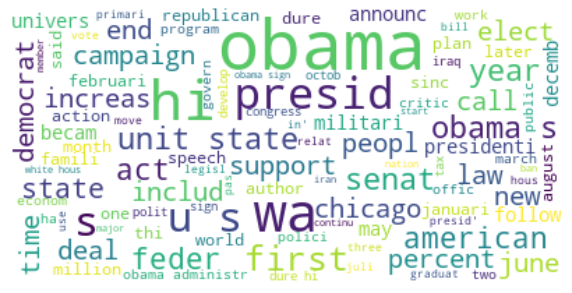

In [37]:
# code to print a wordcloud for your sentences

!pip install wordcloud
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Why did we do all this work?

In [38]:
# reFetching the data
lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [0]:
'''
Doing the same without removing stop words or lemming
'''
# tokenize the text using sent_tokenize

# from this list of sentences, create a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)

<Figure size 432x288 with 0 Axes>

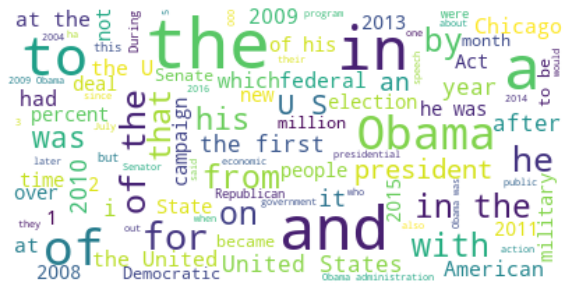

In [40]:
# Redo the word cloud but set stopwords to empty so it looks really bad
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [''],
                        include_numbers = True).generate(str(lame_text)) 
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [41]:
# Training the Word2Vec model (same code as before), but one change: use our lame data that was not preprocessed

# Try printing this after training the model.
words = model.wv.index_to_key
print(words[:10])

['the', 'in', 'a', 'of', 'and', 'to', 'obama', '``', 'on', 'he']


In [0]:
# Finding a vector of a word, but badly

In [0]:
### Finding the most similar words in the model but... you get the idea ###



## Reflection
How important do you think proper preprocessing in NLP is?